# DCL - Data Control Language

It is a subset of SQL statements that are used to __control access to data within a database.__ DCL statements are primarily focused on managing permissions, security, and access privileges for users and roles. The two main DCL commands are `GRANT` and `REVOKE`.

https://www.geeksforgeeks.org/mysql-grant-revoke-privileges/

### GRANT

The `GRANT` statement is used to give specific privileges to users or roles. 
   
These privileges could include the ability to perform certain actions on tables or views like :


- SELECT


- INSERT 


- UPDATE 


- DELETE etc. 

. 
By using `GRANT`, you allow users to access and manipulate data in specified ways.

```sql
GRANT privilege_type ON table_name TO username_or_role;
```

1. **Granting SELECT permission to a user on a table:**
   
   ```sql
   GRANT SELECT ON employees TO alice;
   ```

   In this example, the `SELECT` permission is granted to the user `alice` on the `employees` table. This allows Alice to retrieve data from the table.



2. **Granting EXECUTE permission on a stored procedure to a role:**

   ```sql
   GRANT EXECUTE ON my_procedure TO hr_role;
   ```

   In this example, the `EXECUTE` permission is granted to the role `hr_role` on the `my_procedure` stored procedure. This allows all users who belong to the `hr_role` role to execute the procedure.



3. **Granting multiple permissions at once:**

   ```sql
   GRANT SELECT, INSERT, UPDATE, DELETE ON orders TO sales_team;
   ```

   This statement grants `SELECT`, `INSERT`, `UPDATE`, and `DELETE` permissions on the `orders` table to the `sales_team` role.



4. __Granting All the Privilege to a User in a Table :__ 


    To Grant all the privileges to a user named “Amit” in a table “users”, the following Grant statement should be executed.

```sql
GRANT ALL ON Users TO 'Amit'@'localhost';
```

##### GRANT SELECT PERMISSION ON VIEW:

The most common privileges are SELECT, which allows users to retrieve data from the view, and USAGE, which grants permission to use the view.

```sql
GRANT 
SELECT, USAGE ON AppleStoreSalesView 
TO username;
```

##### GRANT SELECT & INSERT PERMISSION ON TABLE : 

```sql
GRANT 
SELECT, INSERT ON employee_table 
TO 'username';
```

### REVOKE :
   The `REVOKE` statement is used to take away previously granted privileges. This is done to restrict or remove access from users or roles. It's the opposite of the `GRANT` statement.

```sql
REVOKE privilege_type ON object_name FROM user_or_role;
```

1. **Revoking SELECT permission from a user on a table:**

   ```sql
   REVOKE SELECT ON employees FROM alice;
   ```

   This statement revokes the `SELECT` permission from the user `alice` on the `employees` table, removing her ability to retrieve data from the table.



2. **Revoking EXECUTE permission from a role on a stored procedure:**

   ```sql
   REVOKE EXECUTE ON my_procedure FROM hr_role;
   ```

   This statement revokes the `EXECUTE` permission from the `hr_role` role on the `my_procedure` stored procedure, preventing users in that role from executing it.



3. **Revoking multiple permissions at once:**

   ```sql
   REVOKE SELECT, INSERT, UPDATE, DELETE ON orders FROM sales_team;
   ```

   This statement revokes `SELECT`, `INSERT`, `UPDATE`, and `DELETE` permissions from the `sales_team` role on the `orders` table.


##### REVOKE PERMISSION ON VIEW:

```sql
REVOKE SELECT, USAGE ON AppleStoreSalesView 
FROM username;
```

###### REVOKE SELECT & INSERT PERMISSION ON TABLE :

```sql
REVOKE 
SELECT, INSERT ON employee_table 
FROM 'username';
```

### NOTE : in GRANT we use "to username" and in REVOKE we use "from username"

# VIEWS

https://www.youtube.com/watch?v=cLSxasHg9WY&list=PLavw5C92dz9Ef4E-1Zi9KfCTXS_IN8gXZ&index=12

### What are Views?
In SQL, a view is a __virtual table that does not store any data on its own but presents a customized view of one or more tables in a database.__ 

A view can be thought of as a pre-defined SELECT statement that retrieves data from one or more tables and returns a specific subset of data to the user.


__So basically it is a logical table instead of a physical table.__


Once a view is created, it can be used in the same way as a table in SQL queries, and any
changes made to the underlying tables will be reflected in the view.(Show)

### NOTE :  View never stores data it only stores structure of the table.

## create VIEW Syntax

```sql
CREATE VIEW indigo AS
SELECT * FROM flights_data
WHERE airline='Indigo';
```

```sql
SELECT * from indigo;
```

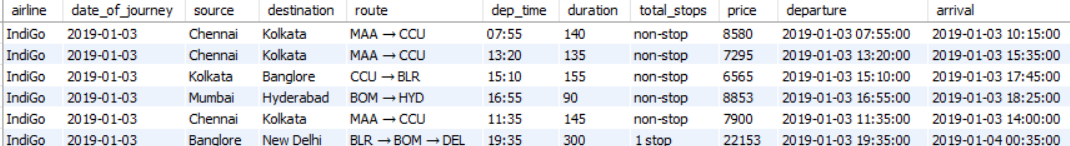

### Uses of VIEWS:

Here are some common uses of VIEWs in MySQL:


- __Data Abstraction :__ You can use a VIEW to abstract complex data structures, making it easier to work with the data. For example, you can create a VIEW that combines data from multiple tables and present it as a single, simplified table.


- __Data Security :__ A VIEW can be used to restrict access to sensitive data by limiting the columns or rows that are visible to specific users.


- __Data Consistency :__ A VIEW can be used to enforce data consistency by preventing direct updates to the underlying tables and forcing all updates to be made through the VIEW.


- __Simplifying Complex Queries :__ You can use a VIEW to simplify complex queries by encapsulating the logic of the query in the VIEW definition. This makes it easier to understand and maintain the query, and also makes it easier to reuse the query in multiple places.

```sql
CREATE VIEW vw_employee_info AS
SELECT first_name, last_name, hire_date
FROM employees;
```

__NOTE :__ Once a VIEW is created, you can use it just like a regular table in your SELECT, UPDATE, and DELETE statements.

```sql
SELECT * from vw_employee_info;
```

### Advantages of using view: 

- __Simplify complex queries :__ Views break down complex queries into smaller pieces.


- __Improve data security :__ Views restrict access to sensitive data by only exposing a subset of columns.


- __Reuse and maintain code :__ Views encapsulate complex calculations and logic for reuse and easy maintenance.


- __Improve performance :__ Views simplify complex queries and make them more efficient.


- __Abstract data :__ Views provide a simplified and unified view of data.



__NOTE : VIEW is not faster than a normal query__

### Advantage of using view for security:

- not giving full access of table to the client.

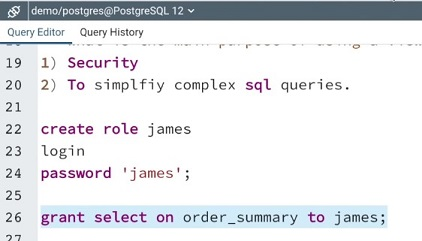

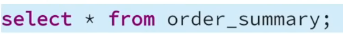

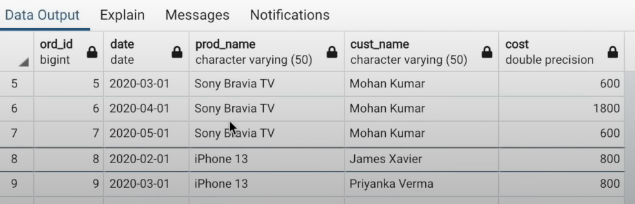

### NOTE : client will not be able to see the query behind the view

## Rules for using CREATE OR REPLACE in view to Modify the view:

### 1. **Column Names and Data Types:** 

`You can` modify column names, aliases, and expressions in the `SELECT` statement of the view, but you should ensure that the new column names and data types match the expected usage in dependent queries.

```sql
CREATE OR REPLACE VIEW vw_employee_info AS
SELECT CONVERT(sl_no as VARCHAR(255)) as serial_number,
first_name, last_name, hire_date
FROM employees;
```

##### this query will work when we are changing column name and datatype of sl_no as serial_no and datatype from int to varchar

### 2. **Column Order:** 

When altering a view using `CREATE OR REPLACE`, `you can change the order` of the columns in the `SELECT` statement, but this should be done carefully, as it might affect queries that rely on the column order.

```sql
CREATE OR REPLACE VIEW vw_employee_info AS
SELECT CONVERT(sl_no as VARCHAR(255)) as serial_number,
 hire_date , first_name, last_name
FROM employees;
```

##### this query will work when we are changing order of hire_date column. bringing it before first_name

### 3.  **Column Count:** 

We can add new columns in the view at any position

```sql
CREATE OR REPLACE VIEW vw_employee_info AS
SELECT CONVERT(sl_no as VARCHAR(255)) as serial_number,
CONCAT(first_name,' ', last_name) as 'full_name',
 hire_date , first_name, last_name
FROM employees;
```

##### adding a new column full_name

## ALTER VIEW in view:


- Columns can be renamed using ALTER 

```sql
CREATE OR REPLACE VIEW vw_employee
as
select * from emplyees
WHERE name like 'am%';
```

### NOTE: FOR VIEW :

> __1. If we add new data  or change data of the table then view will show it and automatically get updated. but vice-versa is not true.__

>> __But Making changes in "read only view" won't reflect on original table__

```sql
UPDATE iphone
SET store_name = 'apple Original 1'
WHERE product = 'Apple Original 1';
```

##### the view made on iphone table
```sql
select * from iphone_sales;
```

##### the view  updated automatically

>__2. But we change the structure of the table then view wont show it and we need to recreate or refresh the view.__

### DROP view

```sql
DROP VIEW vw_employee;
```

### Types of views

#### 1. Simple Views - Created from 1 single table


#### 2. Complex Views - Created from multiple tables with the help of joins, subquery etc.

```sql
select * from flights_data;
```

```sql
CREATE VIEW indigo AS
SELECT * FROM flights_data
WHERE airline='Indigo';
```

### Complex View:

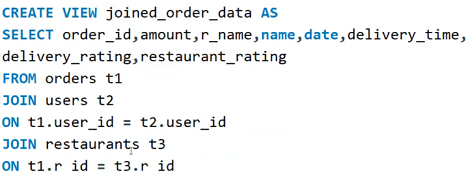

### Read only Vs Updatable Views

- __Read-only views:__ As the name suggests, read-only views are views that cannot be
updated. They are used to simplify the process of querying data, but they cannot be
used to modify or delete data in the underlying tables.


- __Updatable views:__ Updatable views are views that allow you to modify, insert or
delete data in the underlying tables through the view. They behave like normal
tables, but with restrictions.


To make a view updatable, certain conditions must be met. For example, the view
must not contain any derived columns, subqueries, or aggregate functions.
Additionally, the view must be based on a single table or a join of tables with a
unique one-to-one relationship.

### NOTE: changes made only in "updatable views" will be reflected in the base tables

### Updatable views should follow the below rules : 

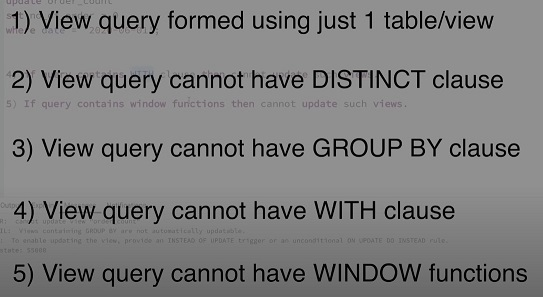

These rules ensure data integrity and consistency. Here are the typical rules that updatable views should follow:

1. **Single Table Rule:** The view must be based on a single underlying table (or a set of joined tables) to ensure clear mapping of modifications.


2. **Key Preservation Rule:** The view must contain enough information to uniquely identify each row in the underlying table(s), ensuring that updates can be correctly targeted.


3. **Updatable Columns Rule:** Columns that are part of the view and can be updated must originate from a single base table, not computed or aggregated columns.


4. **No Derived Columns Rule:** Calculated or derived columns cannot be modified through the view; only directly mapped columns are updatable.


5. **No Aggregate Functions Rule:** Views with aggregate functions (e.g., SUM, COUNT) usually aren't updatable, as they represent summary data.


6. **No GROUP BY Rule:** Views with a GROUP BY clause often can't be updated due to the potential ambiguity of applying updates to grouped data.


7. **No UNION/JOIN with UPDATE Rule:** Views that involve unions or joins might not be updatable if they introduce complexities in mapping changes.


8. **No Subqueries Rule:** Views with subqueries in the SELECT statement generally can't be updated, as they make the mapping between view and base data unclear.


9. **Column Check Rule:** Views may have CHECK constraints that ensure updated values meet certain criteria.


10. **No ROWID Pseudocolumn Rule:** Views should not expose the ROWID pseudocolumn, which uniquely identifies rows internally in Oracle databases, as it can lead to inconsistencies.


11. **No DISTINCT Keyword Rule:** Views with DISTINCT might not be updatable due to potential ambiguities when updating duplicated data.


12. **No GROUP BY in WHERE Clause Rule:** Views containing GROUP BY clauses in the WHERE condition might not be updatable.


13. __No with clause() and WINDOW function__

It's important to note that different database management systems may have variations in these rules, and some systems might support more complex updatable views through mechanisms like triggers. Always refer to the documentation of your specific database system for detailed information on updatable views and their limitations.

### NOTE : Complex view can also lead to Updatable view given table is joined with itself with doing any group or agg in it.

```sql
CREATE VIEW ComplexUpdateableView AS
SELECT Orders.OrderID, Customers.CustomerName
FROM Orders
JOIN Customers ON Orders.CustomerID = Customers.CustomerID;

```

## Apply restrictions on users with access to view of the table regarding updating the table

When you grant a user access to a view, you can control whether the user's actions on the view can affect the underlying base table. To ensure that changes made to the view do not affect the original table, you need to set up the appropriate permissions and restrictions. Here's how you can achieve this:

1. **Use Read-Only Views:** When granting access to a view, only provide `SELECT` permissions to the user. This way, they can retrieve data from the view but won't be able to modify it.



2. **Revoke Write Permissions:** Ensure that the user doesn't have any write permissions (`INSERT`, `UPDATE`, `DELETE`) on the view. You can use the `REVOKE` statement to remove such permissions if they were granted unintentionally.



3. **Database Permissions:** Make sure that the user doesn't have direct write permissions on the underlying base table. This will prevent them from affecting the original table even if they attempt to do so through the view.



4. **Use Read-Only Roles:** Assign the user a read-only role that grants access only to views and not the underlying tables. This way, they won't have the capability to modify data even if they try to modify the view.



5. **Use Triggers or Stored Procedures:** If you want to provide users with limited write access to certain data, consider using triggers or stored procedures. These mechanisms can help you control the actions users can take, ensuring that modifications go through controlled processes.



6. **Regular Auditing and Monitoring:** Regularly audit and monitor the user's actions and permissions to ensure they are not making unauthorized changes. Monitoring tools and database logs can help you keep track of user activities.



Remember that security measures should be implemented based on your specific requirements and the sensitivity of the data. Carefully consider the level of access each user needs and implement the necessary checks to prevent unintended modifications.

---

## MATERIALIZED VIEW
https://www.youtube.com/watch?v=WzkBZ0byoYE&list=PLavw5C92dz9Ef4E-1Zi9KfCTXS_IN8gXZ&index=17

### NOTE : Mysql doesnot have materialized view but it holds data unlike views

A Materialized View is a pre-computed table that is stored on disk, which can be used to improve query performance by reducing the amount of data that needs to be processed at runtime.

A materialized view is a database object in SQL that contains the results of a query. Unlike regular views, which are just virtual tables that store SQL queries, materialized views are physical tables that store the results of a query.

Materialized views are precomputed and stored on disk, which makes them much faster to access than regular views.

__Benefit - Faster queries__


__Disadvantage - Need to manually update the view__

### query : 

```sql
create materialized view mv_random_tab
as
select id, avg(val), count(*)
from random_tab
group by id;

select * from my_random_tab;
```

- The results will be same as using a select statement but faster.


- The data in materialized view will not automatically update if table gets updated. Can only be updated using refresh
    
    - eg : refresh materialized view mv_random_tab;


-  Donot create materialized view for each and every data

### NOTE : data inside Materialized view will not get updated automatically if data is changed under the base table.


> __REFRESH MATERIALIZED VIEW materialized_view_name;__


### <span class="girk">Benefits of using Materialized views provide:</span>

1. Improved query performance by storing precomputed results.


2. Enhanced data aggregation and summarization capabilities.


3. Reduced workload on the database server.


4. Support for offline analysis of specific datasets.


5. Increased scalability for handling larger datasets and complex queries.


6. Query optimization for frequently accessed or resource-intensive queries.


7. Enhanced data integrity and consistency by storing precomputed results.



__In summary, Materialized Views are a powerful tool that can significantly improve query performance, reduce data redundancy, enforce data consistency, improve scalability, and simplify data management in SQL databases.__

### Difference between view and materialized view() : 

___Materialized view stores the data and the query but view only stores the datanot the  query .___

- A View is a virtual table that does not store data but contains a SELECT statement that is executed each time the View is referenced in a query. 

- A Materialized View is a pre-computed table that stores data on disk and can be used to improve query performance. 


- Views always reflect the most up-to-date data, but have no performance benefits. 

- Materialized Views need to be refreshed and use more disk space, but can significantly improve query performance.

### Why we need materialized views when we already have VIEW in sql?


Materialized views in SQL are physical tables storing precomputed results, providing faster query performance, reducing processing load, enabling offline analysis, and enhancing data aggregation. 

They offer tangible performance benefits over regular views, which are virtual tables that do not store data themselves.

__Reduced Processing Load :__ Since materialized views store precomputed results, they reduce the computational load on the database server when executing complex queries. This can lead to faster response times and improved overall database performance.

__Offline Analysis :__ Materialized views enable users to perform offline analysis on a specific set of data without impacting the performance of the main database. This is particularly useful when dealing with large datasets or when performing complex analytical operations.

---
---

# User Defined Functions

##### Functions are of 2 types:

1. Built in


2. User defined

#### What are user defined function and their advantages

User-defined functions (UDFs) in SQL are functions that are created by users to perform specific tasks. These functions can be used just like built-
in functions in SQL and can take parameters as input, perform some operations on them, and then return a value.

under the database go to functions. Click on create function:

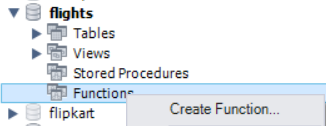

```sql 
SET GLOBAL log_bin_trust_function_creators = 1;
```

### Syntax

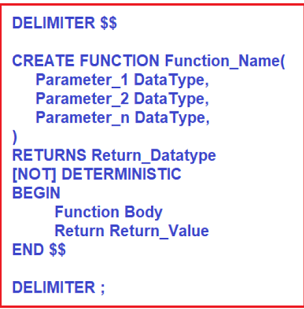

### Benefits of user defined function

1. Simplifies SQL queries


2. Reusability


3. Enhances readability

### parameterized vs non parameterized

A parameterized function accepts input values (parameters) when called, allowing flexibility and reusability, 

while a non-parameterized function operates with fixed internal values and lacks adaptability to different scenarios.

### NOTE : parameters name can be different from column names on which function will be applied

### eg 1 - hello world()

```sql
CREATE FUNCTION hello_world()
RETURNS VARCHAR(255) DETERMINISTIC
BEGIN
    DECLARE message VARCHAR(255);
    SET message = 'Hello World';
    RETURN message;
END
```

```sql
SELECT hello_world()
```

### eg- 2 : Calculate age in years(for col)

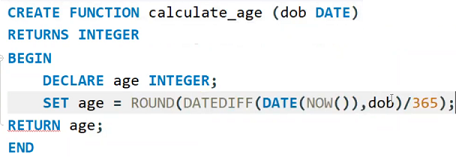

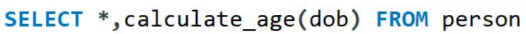

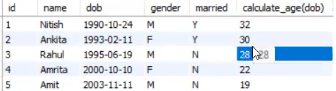

### eg - 3 : greet with name -> conditional title-> user defined function for Mr/Mrs/Miss : 

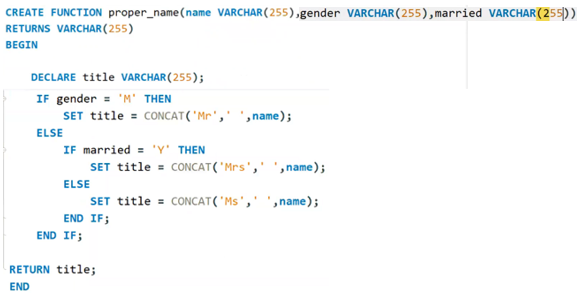

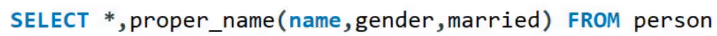

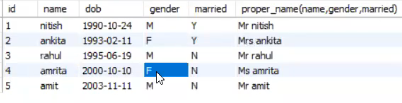

### 3 else if condition: diabities or not

```sql
CREATE FUNCTION `diab_or_not` (d INT)
RETURNS VARCHAR(255)
BEGIN
DECLARE m VARCHAR(255);
	IF d < 90 THEN
		set m = 'NO';
	ELSEIF d = 90 THEN
		set m = 'Maybe';
	ELSE 
		set m = 'YES';
	END IF;
RETURN m;
END
```

```sql
select *, diab_or_not(Glucose) from diab;
```

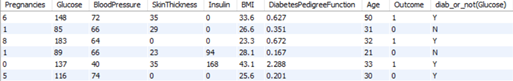

### Deterministic vs Non-Deterministic Functions :

Deterministic functions always produce the same result for the same input, while non-deterministic functions can yield different results even with the same input due to factors like randomness or external influences.

#### eg : 

##### Deterministic function: always returns the same result for the same input:

##### Non-deterministic function: can produce different results depending on external factors:

### eg-4 : Date formatting and flights between 2 cities:  (Deterministic vs Non-Deterministic)

### Determininstic:

> __date\_format will always give same format__

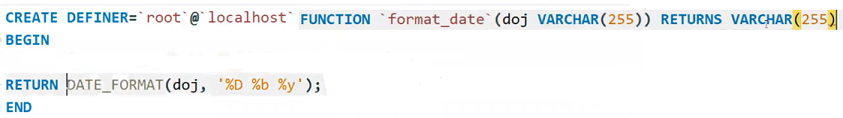

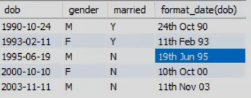

### NON Determininstic:

> __as number of flights will change based on current date. New flights will be added everyday so every day same function will give different results :__

#### now for number of flights :  (here in the function itself we are giving table name)

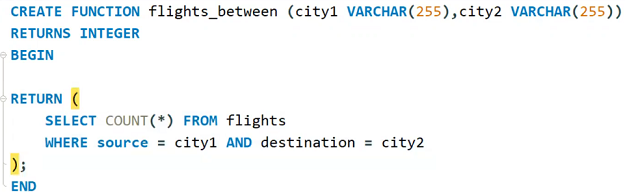

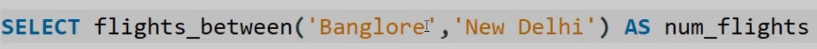

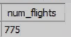

### example : rows with age between 20 and 50 :

```sql
CREATE FUNCTION `age_less_more`(age1 INT, age2 INT) RETURNS int
BEGIN

RETURN 
(SELECT count(*) from diab
WHERE Age between age1 AND age2);
END
```

```sql
select *, age_less_more(20,50) from diab;
```

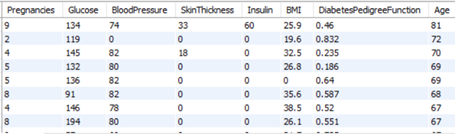

### Making table_name variable

#### wrong statement, find a correct statement:

```sql
CREATE FUNCTION flights_count(city1 varchar(255), city2 varchar(255), name_table varchar(255))
RETURNS INTEGER
BEGIN
    DECLARE query_statement VARCHAR(1000);
    DECLARE count_result INT;
    
    SET query_statement = CONCAT('SELECT COUNT(*) FROM ', name_table, ' WHERE source = ? AND destination = ?');
    
    SET city1_param = city1;
    SET city2_param = city2;
    
    PREPARE stmt FROM query_statement;
    EXECUTE stmt USING city1_param, city2_param;
    FETCH stmt INTO count_result;
    DEALLOCATE PREPARE stmt;
    
    RETURN count_result;
END
```

### USER DEFINED FUNCTION questions

#### **Question 1:** Create a SQL function that calculates the average salary of employees in a given department. The function should take the department ID as input and return the average salary.

**Solution:**
```sql
DELIMITER $$
CREATE FUNCTION CalculateAverageSalary(department_id INT) RETURNS DECIMAL(10, 2)
BEGIN
    DECLARE avg_salary DECIMAL(10, 2);
    
    SELECT AVG(salary) INTO avg_salary
    FROM employees
    WHERE department_id = department_id;
    
    RETURN avg_salary;
END$$
DELIMITER ;
```

#### **Question 2:** Write a SQL function that returns the full name (concatenation of first name and last name) of an employee with a given employee ID.

**Solution:**
```sql
DELIMITER $$
CREATE FUNCTION GetFullName(employee_id INT) RETURNS VARCHAR(255)
BEGIN
    DECLARE full_name VARCHAR(255);
    
    SELECT CONCAT(first_name, ' ', last_name) INTO full_name
    FROM employees
    WHERE id = employee_id;
    
    RETURN full_name;
END$$
DELIMITER ;
```

#### **Question 3:** Create a SQL function that calculates the factorial of a given integer. The function should take an integer as input and return its factorial.

**Solution:**
```sql
DELIMITER $$
CREATE FUNCTION CalculateFactorial(input_num INT) RETURNS INT
BEGIN
    DECLARE result INT;
    DECLARE i INT;
    
    SET result = 1;
    SET i = 1;
    
    WHILE i <= input_num DO
        SET result = result * i;
        SET i = i + 1;
    END WHILE;
    
    RETURN result;
END$$
DELIMITER ;
```

> The __DO keyword is not a standalone__ keyword but is a part of the __WHILE DO loop structure.__ In SQL, the DO keyword is used to specify the body of the loop that needs to be executed repeatedly as long as the specified condition is true.

#### **Question 4:** Write a SQL function that returns the number of orders placed by a given customer based on their customer ID.

**Solution:**
```sql
DELIMITER $$
CREATE FUNCTION GetOrderCount(customer_id INT) RETURNS INT
BEGIN
    DECLARE order_count INT;
    
    SELECT COUNT(*) INTO order_count
    FROM orders
    WHERE customer_id = customer_id;
    
    RETURN order_count;
END$$
DELIMITER ;
```

#### **Question 5:** Create a SQL function that finds the top N products by sales revenue. The function should take N as input and return a result set with the top N products.

**Solution:**
```sql
DELIMITER $$
CREATE FUNCTION GetTopNSellingProducts(N INT)
RETURNS TABLE (
    product_id INT,
    product_name VARCHAR(255),
    revenue DECIMAL(10, 2)
)
BEGIN
    RETURN (
        SELECT p.id AS product_id, p.name AS product_name, SUM(oi.quantity * p.price) AS revenue
        FROM products p
        JOIN order_items oi ON p.id = oi.product_id
        GROUP BY p.id, p.name
        ORDER BY revenue DESC
        LIMIT N
    );
END$$
DELIMITER ;
```

#### Question 6: Create a SQL function that calculates the Levenshtein distance between two strings. The Levenshtein distance is a measure of the similarity between two strings, representing the minimum number of single-character edits (insertions, deletions, or substitutions) required to change one string into the other.

```sql
DELIMITER $$
CREATE FUNCTION LevenshteinDistance(str1 VARCHAR(255), str2 VARCHAR(255)) RETURNS INT
BEGIN
    DECLARE len1 INT;
    DECLARE len2 INT;
    DECLARE cost INT;
    DECLARE d INT;
    
    SET len1 = LENGTH(str1);
    SET len2 = LENGTH(str2);
    
    IF len1 = 0 THEN
        RETURN len2;
    END IF;
    
    IF len2 = 0 THEN
        RETURN len1;
    END IF;
    
    SET d = 0;
    
    IF SUBSTRING(str1, len1, 1) != SUBSTRING(str2, len2, 1) THEN
        SET cost = 1;
    ELSE
        SET cost = 0;
    END IF;
    
    RETURN LEAST(
        LevenshteinDistance(SUBSTRING(str1, 1, len1 - 1), str2) + 1,
        LevenshteinDistance(str1, SUBSTRING(str2, 1, len2 - 1)) + 1,
        LevenshteinDistance(SUBSTRING(str1, 1, len1 - 1), SUBSTRING(str2, 1, len2 - 1)) + cost
    );
END$$
DELIMITER ;
```

#### **Question 7:** Create a SQL function that returns the nth Fibonacci number. The function should take an integer `n` as input and return the nth Fibonacci number. The Fibonacci sequence starts with 0 and 1, and each subsequent number is the sum of the two preceding ones.

**Solution:**
```sql
DELIMITER $$
CREATE FUNCTION GetNthFibonacciNumber(n INT) RETURNS INT
BEGIN
    DECLARE a INT DEFAULT 0;
    DECLARE b INT DEFAULT 1;
    DECLARE result INT;
    DECLARE i INT DEFAULT 1;
    
    IF n = 0 THEN
        RETURN 0;
    END IF;
    
    WHILE i < n DO
        SET result = a + b;
        SET a = b;
        SET b = result;
        SET i = i + 1;
    END WHILE;
    
    RETURN b;
END$$
DELIMITER ;
```

### USER-DEFINED VARIABLE

In MySQL, the @ symbol is used as a user-defined variable. It allows you to store a value or expression and reuse it multiple times within a single query or across multiple queries.

```sql
SET @variable_name = value;
```


```sql
SELECT @variable_name;
```

#### eg : 1

For example, you can use the following syntax to define a user-defined variable in MySQL:

```sql
DELIMITER //

CREATE PROCEDURE calculateSum(IN a INT, IN b INT)
BEGIN
    DECLARE sum INT;
    SET sum = a + b;
    SELECT sum;
END;

//

DELIMITER ;

```

```sql
-- Call the stored procedure and pass the two input values
CALL calculateSum(10, 20);
```

When you call the calculateSum stored procedure with the values 10 and 20, it will calculate the sum and store it in the sum variable declared within the procedure.

If you want to use session variables in regular SQL queries, you can do so by using the SET statement:

```sql
SET @sum = 10 + 20;
SELECT @sum;
```

#### eg 2:

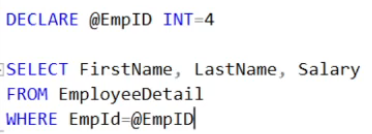

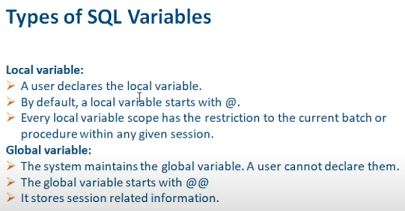

### NOTE : Global variable cannot be declared by user

#### eg-3 -> Session-Based Storage:

```sql
SET @user_id := 123;
SELECT * FROM users WHERE id = @user_id;
```

Here, @user_id stores the user ID for reuse in subsequent queries within the same session.

#### eg-4 -> Conditional Logic:

you can assign a value to a variable based on a condition and then use that variable later in the query.

Here, @category is assigned a value based on the condition.

```sql
SELECT id, value,
    CASE
        WHEN value > 50 THEN @category := 'High'
        WHEN value > 25 THEN @category := 'Medium'
        ELSE @category := 'Low'
    END AS category
FROM your_table;
```

#### eg-5 -> Calculating Differences:

User-defined variables can be used to calculate the difference between consecutive rows in a result set:

```sql
SELECT id, value, value - @prev_value AS value_difference,
    (@prev_value := value) AS previous_value
FROM your_table
JOIN (SELECT @prev_value := NULL) AS init;
```

In this query, @prev_value stores the previous row's value for comparison.

---
---
---

# Stored Procedures

https://www.youtube.com/watch?v=yLR1w4tZ36I&list=PLavw5C92dz9Ef4E-1Zi9KfCTXS_IN8gXZ&index=15

A stored procedure is a named block of SQL statements and procedural logic that is stored in a
database and can be executed by a user or application.



Stored procedures are reusable blocks of code in a database.



___Examples include calculating totals, securing sensitive operations, optimizing reports, and ensuring transaction integrity.___



By using stored procedures,
developers can separate application logic from the presentation layer and simplify the
application code.

#### Procedures can do things which SQL queries cannot

Procedure can include 
- SQL queries
- DML, DDL, DCL, TCL commands
- Collection types
- Cursors
- Loop & IF ELSE statements
- Variables
- Exception Handling

#### Some of the benefits of using stored procedures include:


1. __Improved performance :__ Stored procedures are precompiled and optimized, which can
improve performance and reduce network traffic.


2. __Enhanced security :__ Stored procedures can be granted specific permissions and access
rights, which can improve security and limit access to sensitive data.


3. __Encapsulation of business logic :__ Stored procedures allow developers to encapsulate
complex business logic and make it easier to maintain and update.


4. __Consistency :__ Stored procedures ensure that database operations are performed in a
consistent manner, which can help to maintain data integrity.


5. __Reduced network traffic :__ By encapsulating data access and manipulation logic in stored
procedures, developers can reduce the amount of data that needs to be transmitted over
the network.

### NOTE : Stored Procedures doesnot have RETURN statements.

### 1. Create stored procedure to create a new user. If already exists Show error message otherwise add

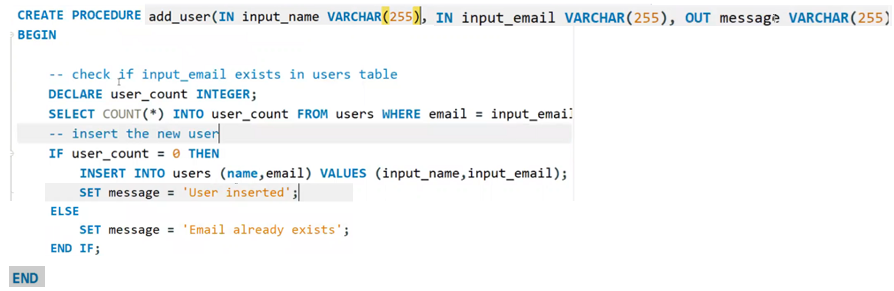

##### as the function needs 3 parameters : name,email,message so we will create a message

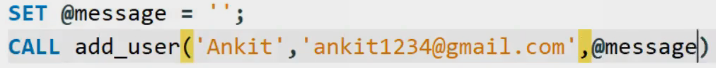

##### to view the output :

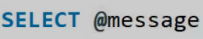

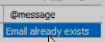

### 2. Create stored procedure to show orders placed by 1 single user when email is passed

```sql

CREATE PROCEDURE `user_orders`(IN unput_email VARCHAR(255))
BEGIN
	DECLARE id INT;
    
    -- fetching user id of the person with the eamil id
    SELECT orders INTO id FROM users WHERE email = unput_email;
    
    SELECt * from users WHERE order_id = id;
END
```

##### using 3rd user : vartika@gmail.com

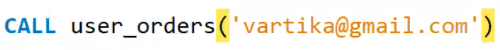

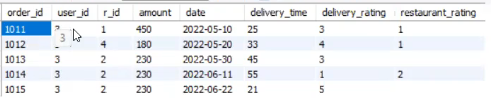

### 3. Create a stored procedure to place an order when user_id, restuarant_id, food_id is provided and also display total amount of order placed

##### how the data should look after insertion :
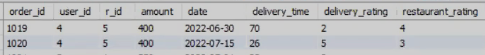

### NOTE : CREATE OR REPLACE PROCEDURE doesnot works in MYSQL. Need to drop the procedure and recreate it again.

```sql
DROP PROCEDURE IF EXISTS place_order;
```

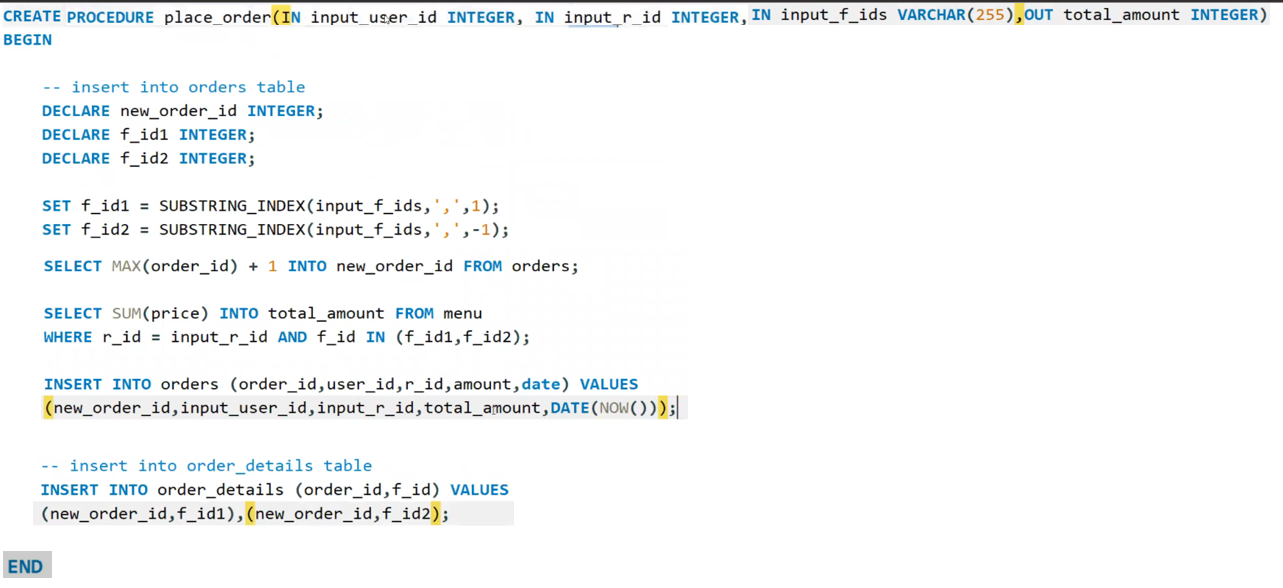

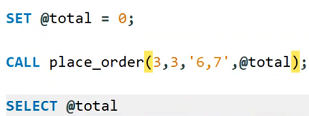

##### output:
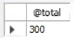

##### select * from orders;

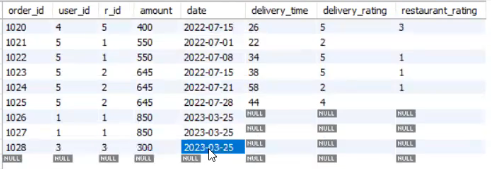

##### select * from order_details;

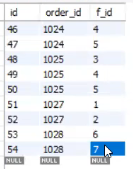

### 4. another example : procedure without parameters

> __Q. When iphone 13 Pro Max is bought, insert the order in sales table and decrease the quantity_remaining from products table and increase quantity_sold in products table. quantity is kept = 1__

#### inital tables:

##### initial products table :  
```sql
select * from products;
```

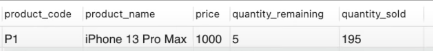

##### initial sales table:
```sql
select * from sales
```

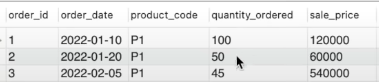

#### procedure : 

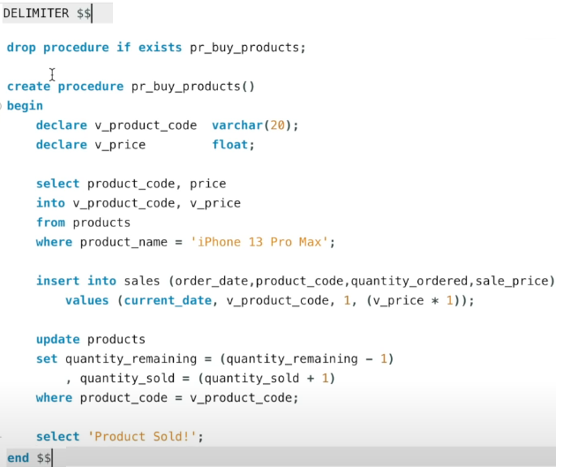

#### run the procedure

```sql
call pr_buy_products();
```

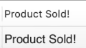

#### output:

##### product_table:

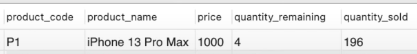

##### sales table:
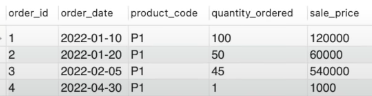

### 5. procedure with parameters

> __Q. For every given PRODUCT and the quantity,__

>> __a. Check if product is available based on the required QUANTITY.__

>> __b. If available then modify the database tables accordingly.__


#### initial tables : 

##### product table:

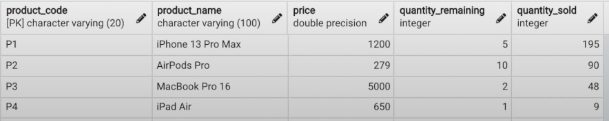

##### sales table : 
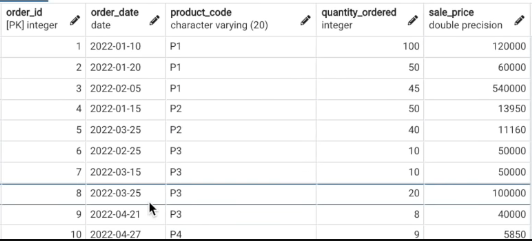

#### procedure : 

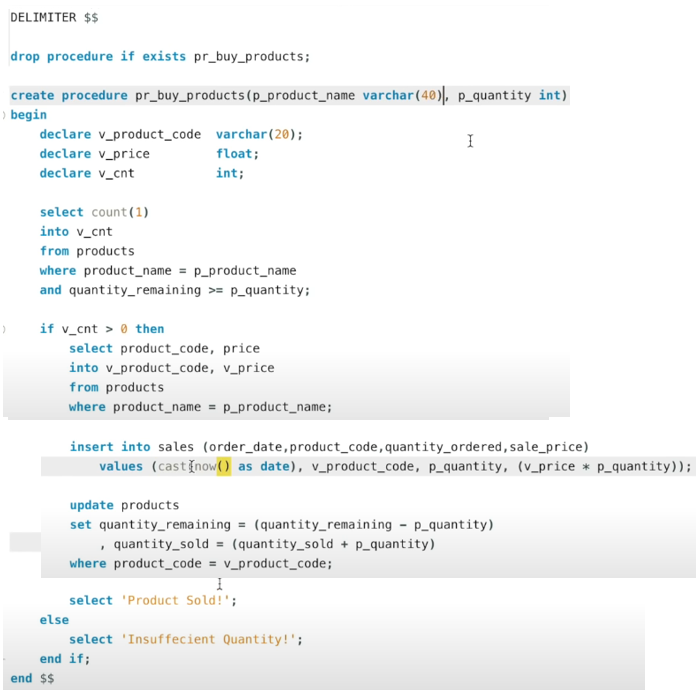

#### run the procedure : 

```sql
call pr_buy_products('Airpods Pro',5);
```

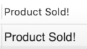

#### output

##### products_table:
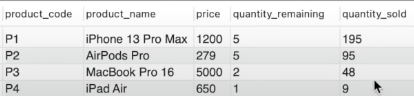

##### sales_table:
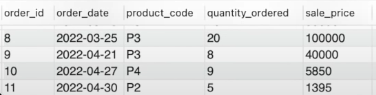

#### 11th row added

### UDFs vs Stored Procedures

**User-Defined Functions (UDFs):**

- Returns a single value or a table.


- Designed to be used in SQL expressions.


- Can be used in SELECT, WHERE, and other clauses.


- Cannot contain DML statements that modify data.


- Can be called directly within queries.


**Stored Procedures:**


- Executes a series of SQL statements.


- Often used for encapsulating business logic.


- Can contain DML statements that modify data.


- Supports input and output parameters.


- Can be executed using a CALL statement.

---
---